In [3]:
from collections import OrderedDict
import csv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# plot formatting

plt.rcParams['font.size'] = 10
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Ridge Regression

## Part 1

In [4]:
# load feature variables and their names
X = np.loadtxt('hitters.x.csv', delimiter=',', skiprows=1)
with open('hitters.x.csv', 'r') as f:
    X_colnames = next(csv.reader(f))

# load salaries
y = np.loadtxt('hitters.y.csv', delimiter=',', skiprows=1)

X -= X.mean(0)[None, :]
X /= X.std(0)[None, :]

## Part 2

In [5]:
X_aug = np.hstack((np.ones((X.shape[0], 1)), X))

def ridge(X_aug, y, lamda):
    eye_aug = np.eye(X_aug.shape[1])
    eye_aug[0, 0] = 0
    return np.linalg.inv(X_aug.T @ X_aug + lamda * eye_aug) @ (X_aug.T @ y)

## Part 3

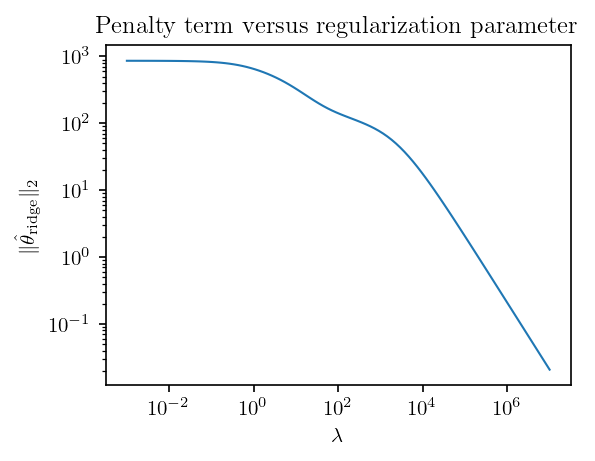

In [6]:
lamdas = np.logspace(-3, 7, 100)
theta_hats = np.array([ridge(X_aug, y, lamda) for lamda in lamdas])

norm_penalties = np.sqrt((theta_hats[:, 1:]**2).sum(1))

plt.loglog(lamdas, norm_penalties)

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\|\hat{\theta}_\mathrm{ridge}\|_2$')
plt.title('Penalty term versus regularization parameter')
plt.show()

## Part 4

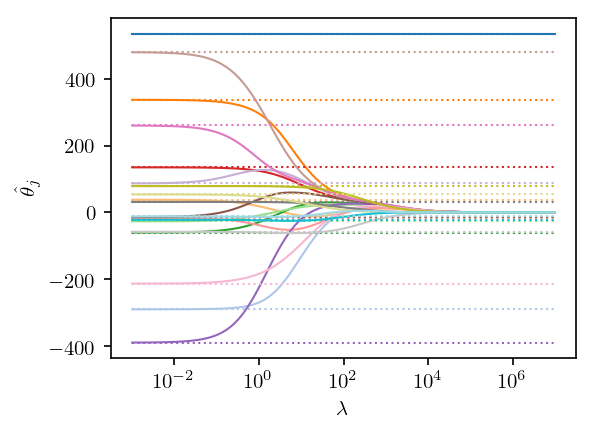

In [7]:
theta_mse = ridge(X_aug, y, 0)

for j, theta in enumerate(theta_mse):
    plt.semilogx(lamdas, np.ones_like(lamdas) * theta, ':', c=plt.cm.tab20(j/20))
    plt.semilogx(lamdas, theta_hats[:, j], c=plt.cm.tab20(j/20))

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\hat{\theta}_j$')
plt.show()

## Part 5

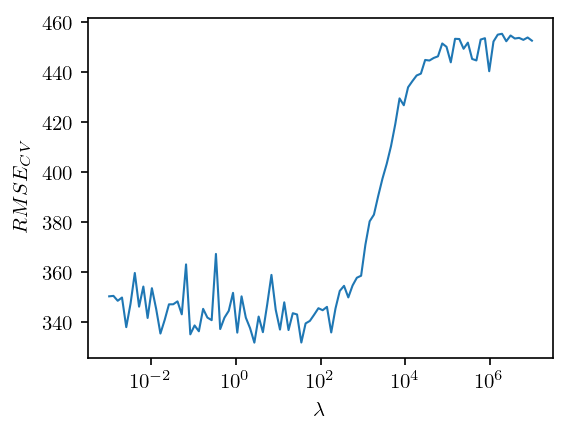

Best value of lambda: 2.71859


In [8]:
def cv_ridge(X_aug, y, lamda, n_folds=5):
    
    fold_size = X_aug.shape[0] // n_folds
    perm = np.random.permutation(X_aug.shape[0])
    
    errors = []
    
    for k in range(n_folds):
        test_mask = np.zeros(X_aug.shape[0], dtype=bool)
        test_mask[k*fold_size:(k+1)*fold_size] = True
        train_mask = np.logical_not(test_mask)
        
        X_train, X_test = X_aug[perm[train_mask], :], X_aug[perm[test_mask], :]
        y_train, y_test = y[perm[train_mask]], y[perm[test_mask]]
        
        theta = ridge(X_train, y_train, lamda)
        errors.append(((y_test - X_test @ theta)**2).mean())
    
    return errors

cv_errors = np.sqrt(np.array([cv_ridge(X_aug, y, lamda, n_folds=5) for lamda in lamdas]).mean(1))

plt.semilogx(lamdas, cv_errors)

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$RMSE_{CV}$')
plt.show()

best_lamda_i = np.argmin(cv_errors)
best_lamda = lamdas[best_lamda_i]
print('Best value of lambda: %g' % best_lamda)

## Part 6

In [9]:
best_theta = ridge(X_aug, y, best_lamda)

for i, feature_name in sorted(enumerate(['bias'] + X_colnames), key=lambda x: best_theta[x[0]]):
    print('%s: %g' % (feature_name, best_theta[i]))

AtBat: -230.957
CWalks: -155.471
CAtBat: -118.621
DivisionW: -61.474
Years: -49.8335
Errors: -24.8789
NewLeagueN: -13.769
Runs: -6.31633
RBI: 2.04896
HmRun: 5.07355
LeagueN: 30.4874
Assists: 41.1608
CHmRun: 55.9586
PutOuts: 77.9061
Walks: 111.378
CRBI: 121.977
CHits: 123.628
CRuns: 223.336
Hits: 247.704
bias: 535.926
